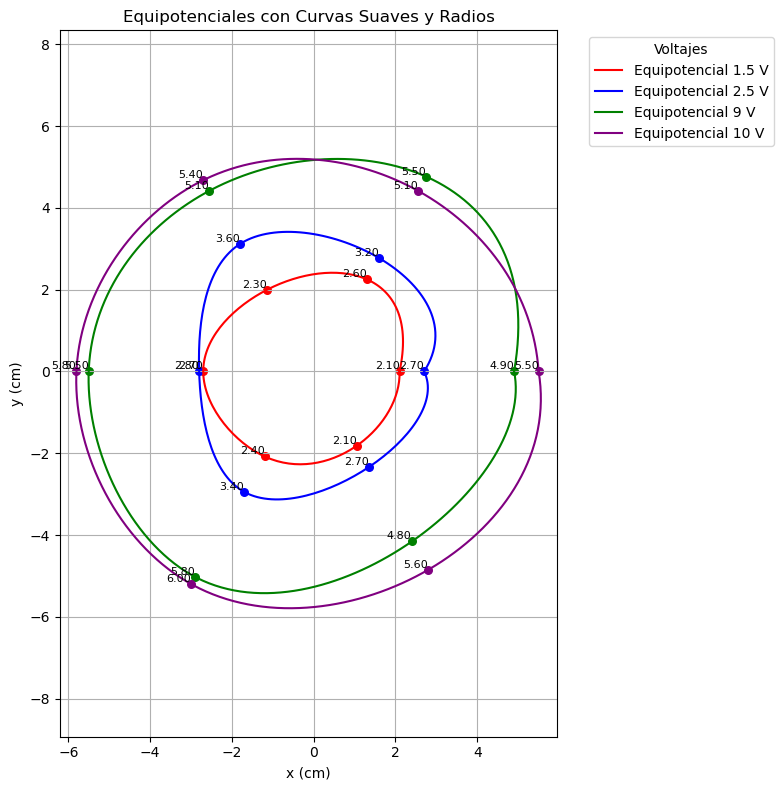

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Datos de las líneas radiales (distancias en cm) para cada equipotencial
equipotenciales = [1.5, 2.5, 9, 10]
lineas_radiales = {
    'L1': [2.1, 2.7, 4.9, 5.5],
    'L2': [2.6, 3.2, 5.5, 5.1],
    'L3': [2.3, 3.6, 5.1, 5.4],
    'L4': [2.7, 2.8, 5.5, 5.8],
    'L5': [2.4, 3.4, 5.8, 6.0],
    'L6': [2.1, 2.7, 4.8, 5.6]
}

# Ángulos para cada línea radial en radianes (6 líneas => 60 grados)
angles = np.linspace(0, 2*np.pi, len(lineas_radiales), endpoint=False)

plt.figure(figsize=(8,8))

colors = ['red', 'blue', 'green', 'purple']  # Colores para los 4 equipotenciales

for idx, V in enumerate(equipotenciales):
    # Obtener puntos x,y originales y radios para etiquetas
    x = []
    y = []
    radios_actual = []
    for i, (linea, radios) in enumerate(lineas_radiales.items()):
        r = radios[idx]  # Radio de la línea radial para esta equipotencial
        angle = angles[i]
        x.append(r * np.cos(angle))
        y.append(r * np.sin(angle))
        radios_actual.append(r)
    
    # Cerrar la curva conectando el último punto con el primero
    x.append(x[0])
    y.append(y[0])
    radios_actual.append(radios_actual[0])
    
    # Crear spline para curva suave
    t = np.linspace(0, 1, len(x))
    spl_x = make_interp_spline(t, x, k=3)
    spl_y = make_interp_spline(t, y, k=3)
    
    t_smooth = np.linspace(0, 1, 200)
    x_smooth = spl_x(t_smooth)
    y_smooth = spl_y(t_smooth)
    
    # Graficar curva suave
    plt.plot(x_smooth, y_smooth, color=colors[idx], label=f'Equipotencial {V} V')
    # Graficar puntos con marcador pequeño
    plt.scatter(x[:-1], y[:-1], color=colors[idx], s=30)
    
    # Agregar etiquetas con el valor del radio (sin indicar línea)
    for (xi, yi, ri) in zip(x[:-1], y[:-1], radios_actual[:-1]):
        plt.text(xi, yi, f'{ri:.2f}', fontsize=8, ha='right', va='bottom')

# Configuración final del gráfico
plt.title('Equipotenciales con Curvas Suaves y Radios')
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.axis('equal')
plt.grid(True)

# Ubicar la leyenda fuera del gráfico, a la derecha
plt.legend(title="Voltajes", bbox_to_anchor=(1.05, 1), loc='upper left')

# Guardar imagen con alta resolución
plt.tight_layout()
plt.savefig("Equipotenciales_con_radios.png", dpi=300, bbox_inches='tight')
plt.show()
